## Car Price Prediction Machine Learning Project

In this project a dataset containing different attributes of cars and their sale price will be used in conjunction with the k-nearest neighbors algorithm to predict the sale price of other cars.

### K-Nearest Neighbors

The k-nearest neighbors algorithm is a type of machine learning model, that uses a dataset to make predictions on a given value or classification. The way it works is by comparing the known attributes of the data point in question to the data in the training set. It then finds the k individuals that are most similar to the one on which the prediction is supposed to be made and using their data to make the prediction.

In [19]:
#imports
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import *
%matplotlib inline
import seaborn as sns
pd.options.display.max_columns = 99

## Data Cleaning

Importing the dataset and specifying the column names:

In [2]:
col_names = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names = col_names)

In [3]:
cars.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


The numerical columns are:
* normalized_losses
* num of doors (currently string but should be easy to change to numerical)
* wheel-base
* length
* width
* height
* curb-weight
* cylinders (str type can be changed)
* engine size
* bore
* stroke
* compression-rate
* horsepower
* peak-rpm
* city-mpg
* highway-mpg
* price, but we won't be using this as a feature, since it's our label

Instead of a normal NaN value '?' is used to signal a missing value. These entries will be replaced with `np.nan` to naje them easier to work with:

In [4]:
cars.replace('?',np.nan, inplace=True)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

some numerical values `object` type and can be converted easily:

In [6]:
column_list = ['normalized-losses','bore','stroke','horsepower','peak-rpm','price']
cars[column_list] = cars[column_list].astype(float)

In [7]:
num_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
            'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate',
           'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
print(cars[num_cols].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    int64  
 6   engine-size        205 non-null    int64  
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-rate   205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    int64  
 13  highway-mpg        205 non-null    int64  
 14  price              201 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 24.1 KB
None


In [8]:
cars[num_cols].isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

There are a lot of missing values in normalized-losses. Dropping these rows will reduce the number of useful data points by a significant amount. The other columns have few NaN values, that can be dropped without having a large impact on the dataset. This is especially true for the NaN values in the `price` column, because that is the value the model will ultimately predict.
In `normalized-losses`, the NaN values will be replaced by the mean of that column.

In [9]:
cars.loc[cars['normalized-losses'].isnull(), 'normalized-losses'] = cars['normalized-losses'].mean()

In [10]:
cars['normalized-losses'].isnull().sum()

0

In [11]:
cars = cars.dropna(subset=num_cols)

In [12]:
cars.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

Now the numeric columns will be normalized, so they have a value between 0 and 1. This is important because the k-nearest neighbors will try to find the most similar data points by calculating the distance between each data point in the dataset and the one for which the prediction is to be made. It then takes the k data points that have the smallest algebraic distance to the prediction data point. If some of the columns have very large values, their impact on the distance will be much higher that of the columns with low values.

In [13]:
#remove price, because it is the value for which the prediction will be made.
num_cols.remove('price')

In [14]:
#normalize the remaining numeric columns
cars[num_cols] = (cars[num_cols] - cars[num_cols].min())/(cars[num_cols].max()
                                                              -cars[num_cols].min())

## K-Nearest Neighbors Model

Now the k-nearest neighbors model will be implemented. A function will be constructed to fit and test a k nearest neighbor model. To fit and test the model, the `sklearn.neighbors.KNeighborsRegressor` will be used.

For simplicity's sake the model will first be tested using only the data of a single column and then expanded.

In [32]:

df = cars
col_feat = 'length'
col_targ = 'price'

def knn_train_test(col_feat, col_targ = 'price', df = cars, k = 5):
    '''Fit and test a k-nearest neighbors model
    Args:
        col_feat (str,list): name or list of names of the column to use as a feature
        col_targ (str) = "price": name of the target column
        df (Pandas DataFrame) = cars: DataFrame on which the model should be applied
    Returns:
        float: root mean square error of the model when applied to the train and test set
    '''
    np.random.seed(1)
    # allowing for the user to either enter a list or a string
    if type(col_feat) == str:
        col_feat = [col_feat]
    # randomizing the dataset
    r_inds = np.random.permutation(df.index)
    df = df.reindex(r_inds)
    # dividing the dataset into a train_set(75%) and a test_set(25%)
    cut_in = int(df.shape[0]*0.75)
    train_set = df.iloc[:cut_in]
    test_set = df.iloc[cut_in:]
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(train_set[col_feat], train_set[col_targ])
    predictions = knn.predict(test_set[col_feat])
    rmse = sklearn.metrics.mean_squared_error(test_set[col_targ], predictions)**0.5
    return rmse

In [21]:
help(sklearn)

Help on package sklearn:

NAME
    sklearn

DESCRIPTION
    Machine learning module for Python
    
    sklearn is a Python module integrating classical machine
    learning algorithms in the tightly-knit world of scientific Python
    packages (numpy, scipy, matplotlib).
    
    It aims to provide simple and efficient solutions to learning problems
    that are accessible to everybody and reusable in various contexts:
    machine-learning as a versatile tool for science and engineering.
    
    See http://scikit-learn.org for complete documentation.

PACKAGE CONTENTS
    __check_build (package)
    _build_utils (package)
    _config
    _distributor_init
    _isotonic
    base
    calibration
    cluster (package)
    compose (package)
    conftest
    covariance (package)
    cross_decomposition (package)
    datasets (package)
    decomposition (package)
    discriminant_analysis
    dummy
    ensemble (package)
    exceptions
    experimental (package)
    externals (package)
   

In [22]:
for col in num_cols:
    print(col, knn_train_test(col))

normalized-losses 6011.397393387372
wheel-base 3899.7840389185753
length 3626.4605069079776
width 4223.196157279122
height 6281.293613872343
curb-weight 4620.6786811339425
engine-size 3600.106719846748
bore 5517.116729611878
stroke 6430.800062391069
compression-rate 6139.234683274987
horsepower 4418.784715096148
peak-rpm 6864.166167830718
city-mpg 3552.957671735319
highway-mpg 4542.0785980672335


The best performing single column with respect to the root_mean_squared is the column 'curb-weight'. This makes sense, because more expensive cars tend to be heavier. At least when ignoring sports cars. It still seems pretty unreliable, though. The next best-performing column is highway-mpg. This also makes sense, since smaller, cheaper cars tend to be more economic with their fuel. Next, the impact the k value has on the efficacy of the model will be tested:

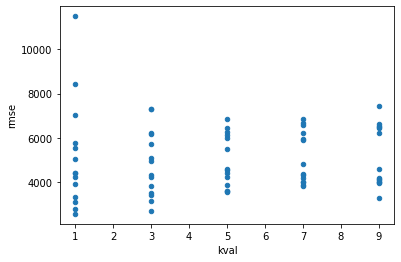

In [24]:
kvaldf = pd.DataFrame()
i = 0
for column in num_cols:
    for k_val in [1,3,5,7,9]:
        kvaldf.loc[i,'column'] = column
        kvaldf.loc[i,'rmse'] = knn_train_test(column, k = k_val)
        kvaldf.loc[i,'kval'] = k_val
        i+=1
kvaldf.plot.scatter(x = 'kval', y = 'rmse')

This graph shows, that as the k value increases, the root mean squared error (rmse) of the rows that have a high rmse at low k decreases, while the rmse of columns, that start out with a low rmse don't seem to be impacted very much, if at all. This is not surprising, because the rmse of features that don't predict the price very well, will on average get better as they have more neighbors. This is because randomly selecting 5 numbers out of a group and then averaging them and comparing them to the average of the entire population gets better as you approach the entire population. So it might be a good idea ti use the features that have a low rmse (there are two distinct groups at high k-values) and ignoring those with a high rmse and just using k = 5. Not using an overly high k value is also important, because after a while, the group of similar individuals will all be included in the k group and adding additional values will lead to the inclusion of individuals that are less and less similar to the one for which the value needs to be predicted.

In [26]:
def top_rows(n):
    '''extract the names of the n columns with the lowest rmses
    Args:
        n (int): number of features to exract
    Returns:
        list of names of the top columns
    '''
    low_re_cols = []
    for column in kvaldf.loc[kvaldf.kval == 5].sort_values('rmse').head(n).column:
        low_re_cols.append(column)
    return low_re_cols

In [27]:
kvaldf.groupby('column').mean().sort_values('rmse')

,rmse,kval
column,,
engine-size,3297.824380,5.0
length,3590.090713,5.0
wheel-base,3754.958064,5.0
city-mpg,3844.973690,5.0
width,3894.302001,5.0
horsepower,4242.336491,5.0
curb-weight,4502.574873,5.0
highway-mpg,4712.440681,5.0
bore,5338.745484,5.0


## Using multiple features:

Now the effect on the rmse will be analyzed when using more than one feature to predict the price. To do this more and more of the best preforming features will be added and the rmse value calculated:

In [33]:
for i in range(len(num_cols)):
    print(i+1,knn_train_test(top_rows(i+1)))

1 3552.957671735319
2 3502.8709043076224
3 3125.430969270233
4 3301.560096656842
5 2856.670763711649
6 2928.817929974271
7 2935.846197522991
8 2792.3688202978183
9 3256.2279811625785
10 3367.572496257656
11 3748.0602049049103
12 3753.698616086295
13 3429.344126261832
14 3602.891504311049


In [35]:
cars.price.mean()

13248.015384615384

The lowest rmse value is when using 5 features. Though it must be said that this leads to an rmse value of 2857 USD, which is quite substantial, when taking into account that the average price of the cars sold in the dataset is about 13000 USD.

the best k values for the three best models are:

2


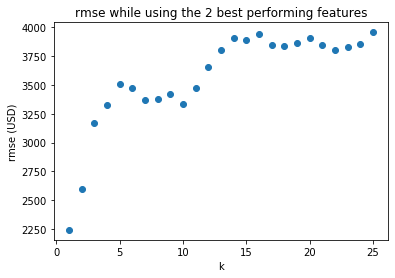

4


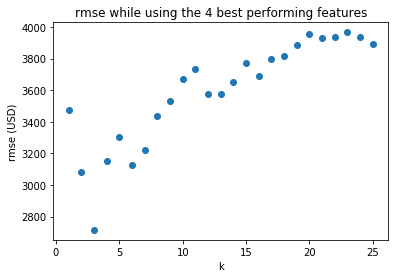

6


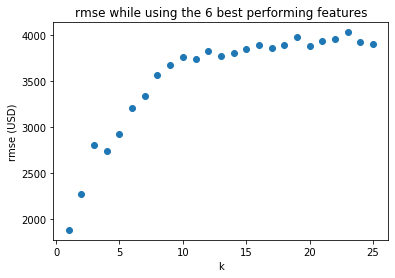

In [40]:

for j in [2,4,6]:
    rmses_k = []
    for i in np.arange(1,26):
        rmses_k.append(knn_train_test(top_rows(j),k = i))
    print(j)
    plt.scatter(x = np.arange(1,26), y = rmses_k)
    plt.xlabel('k')
    plt.ylabel('rmse (USD)')
    plt.title('rmse while using the {} best performing features'.format(j))
#     plt.title(title = str(j)+' features used')
    plt.show()

The models have their respective minimum rmses at k_values of 1,3,1. This could imply that the dataset is very heterogeneous and the sample size too small, making it hard to find multiple similar cars to the one for which the price is being predicted. The fact that the error starts off low and increases with higher k-values, implies, that the selection process done by the model is pretty good.

# Summary

In this project, a k-nearest neighbor regression model was used to predict car prices based on several different attributes and the prices of previously sold cars. In general the model preformed poorly. The root mean squared error was still generally over 2500 USD even after optimizing both the features used to predict the prices and the number of neighbors taken into consideration. This could be due to the fact, that the dataset was too small at around 200 cars, making it difficult for the model to find comparable cars. The k-nearest neighbors algorithm might also not be the ideal machine learning model to use in such a case. 